![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 1 and Session 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (S1 - S2)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_1_2_EXERCISES.ipynb)

## Exercise 1: CSV

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

1. Download raw data from http://jb.gg/pythondevsurvey2017raw
2. Read it in pandas
3. Reproduce "What do you use Python for the most? (single answer)" chart
4. Reproduce "What do you use Python for? (multiple answers)" chart

In [ ]:
import pandas as pd


data = pd.read_csv("pythondevsurvey2017_raw_data.csv")
data.head(5)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

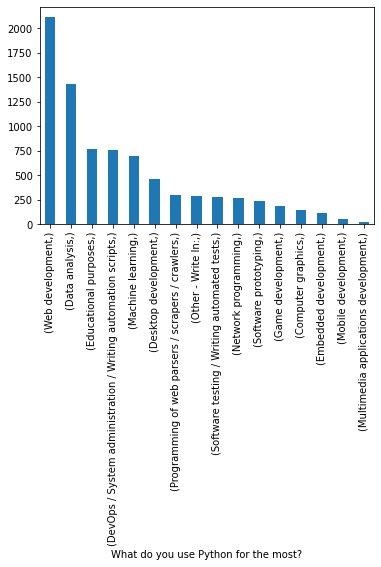

In [ ]:
import matplotlib as plt

data = pd.DataFrame(data)

python_the_most_df = pd.DataFrame(data.iloc[: ,41:42])

python_the_most_df.value_counts().plot.bar()





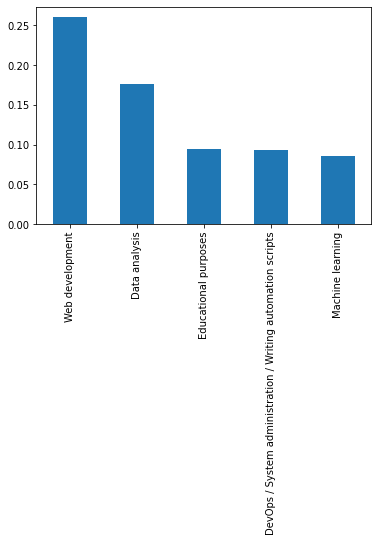

In [ ]:
data["What do you use Python for the most?"].value_counts(normalize=True).head().plot.bar() 


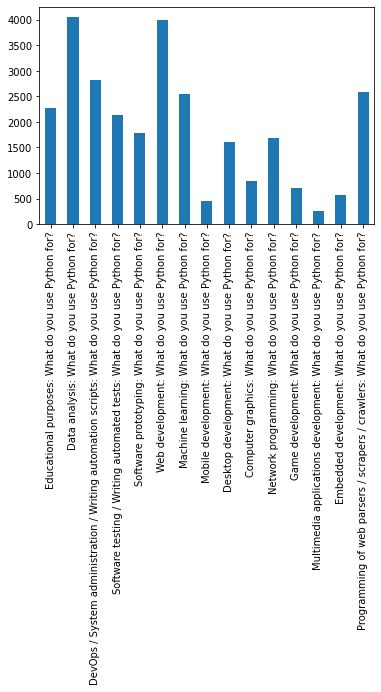

In [ ]:
data1 = pd.DataFrame(data.iloc[ : , 25:40])
data1.count().plot.bar()



# Exercise 2: slicing arrays

Given the array provided in the next cell. Do the following with slicing (check the other notebooks for examples)



*   Print the whole array using slice
*   Print number 12
*   Reverse the array
*   Reverse only one row in the array
*   Slice the first three columns in the array
*   Slice the last three columns and reverse them
*   Slice the last two rows and print them
*   Slice the last integers in a row
*   Slice rows and columns


[Here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) some good examples ;-)





In [ ]:
import numpy as np

a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)
nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
"""Print Whole Array"""

nd_a[:]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
"""Print number 12"""

print(nd_a[2, [1]])

[12]


In [ ]:
"""Reverse the array"""


for i in nd_a[ : :-1]:
  print(i[ : : -1])


[20 19 18 17 16]
[15 14 13 12 11]
[10  9  8  7  6]
[5 4 3 2 1]


In [ ]:
"""Reverse only one row in the array"""

x = nd_a.copy()

x[0] = nd_a[ 0:1 , : :-1]
x

array([[ 5,  4,  3,  2,  1],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
"""Slice the first three columns in the array"""

first_3 = nd_a[ : , 0:3]
first_3

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [ ]:
"""Slice last 3 columns and reverse them"""

last_3 = nd_a[:, -3:]
last_3_rev = last_3[ : , : :-1]
last_3_rev




array([[ 5,  4,  3],
       [10,  9,  8],
       [15, 14, 13],
       [20, 19, 18]])

In [ ]:
"""Slice the last 2 rows"""

last_2_rows = nd_a[-2:]
print(last_2_rows)

[[11 12 13 14 15]
 [16 17 18 19 20]]


In [ ]:
"""Slice the last integers in a row"""

x = ["a", "b", "c", 4, 6, "d", 5, 8, 9]


y = []

for i in x:
  if type(i) == int:
    y.append(i)

y

print(y[-1:])
print(y[-4:])

[9]
[6, 5, 8, 9]


In [ ]:
"""Slice rows and columns"""

sliced_row_col = nd_a[ 1:3, 1:3]
sliced_row_col


array([[ 7,  8],
       [12, 13]])

# Exercise 3: when is best to bike alone?

Given the bike dataset:

* Download the Dataset using curl
* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * When are the busiest hours per week in Total?
    * Where will you be more comfortable (alone) riding during the week in West or East?
    * What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?
    * What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?

In [3]:
"""Download the dataset using curl"""

!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0  1351k      0 --:--:--  0:00:03 --:--:-- 1351k


In [58]:
"""Open the dataset using pandas and display the dataframe"""

import pandas as pd
import matplotlib as plt

# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


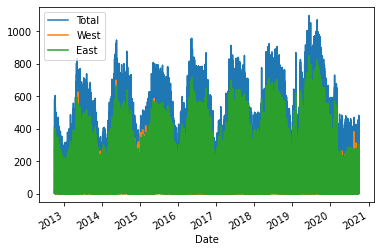

In [5]:
data.columns = ['Total', 'West', 'East']
data.plot()


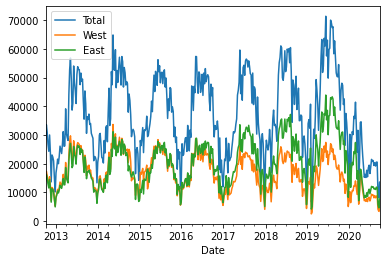

In [6]:
weekly = data.resample('W').sum()
weekly.plot()

As we can see in the two graphs below. In for the total count of bicyclists the busiest time of the day on average is approximately 5:00pm ( when people are leaving work ) and the busiest day of the week is Tuesday. Thus, We can estimate that Tuesday at approximately 5pm will be the busiest time.

Conversely, we can see that Sunday on the East side of the bridge is the quietest day of the week for cyclists, and the quietest time of the day is approximately 3:00am (Sunday night/Monday Morning). Thus, we can estimate that Sunday night/Monday morning at 3:00am on the East side of the bridge is when the cyclist will be most alone.


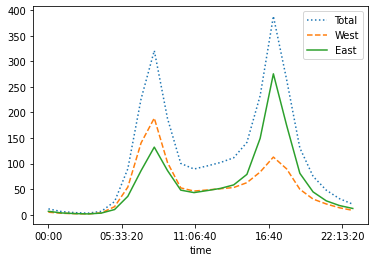

In [7]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
by_time.plot(style = [':', '--', '-'])



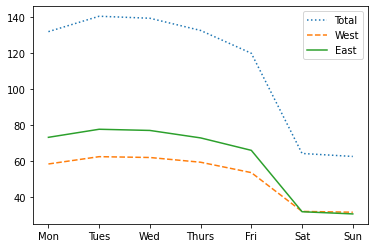

In [8]:
by_weekday = data.groupby(data.index.weekday).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style = [':', '--', '-'])

Now in the below we are grouping by both weekday and time and plotting this to get more accurate results. 

Below, this plot we use the min, max, idxmin, idxmax functions to see the exact times at which the bridge is busiest and quietest.

We can see that the busiest time in total is on Monday eveing at 5:00pm with an average count of 542 cyclists/hour.

We can see that the quiestest time on the bridge is on the east side at 3:00am on Monday morning with an average of 1 cyclist/hour.

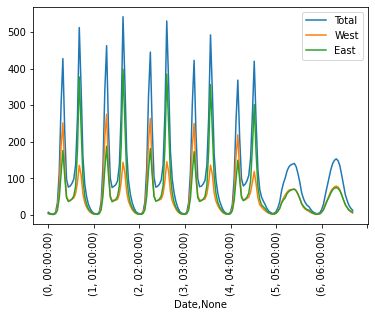

In [9]:
by_weekday_time = data.groupby([data.index.weekday, data.index.time]).mean()
by_weekday_time.plot(rot=90)

In [10]:
by_weekday_time

Total       West       East
Date                                          
0    00:00:00   7.054254   2.985203   4.069051
     01:00:00   3.350185   1.471023   1.879162
     02:00:00   2.367448   1.193588   1.173859
     03:00:00   2.278668   1.213317   1.065351
     04:00:00   7.257707   3.891492   3.366215
...                  ...        ...        ...
6    19:00:00  54.573366  26.940814  27.632552
     20:00:00  38.829840  18.679408  20.150432
     21:00:00  25.451295  11.961776  13.489519
     22:00:00  17.879162   7.776819  10.102343
     23:00:00  12.226880   4.877928   7.348952

[168 rows x 3 columns]

In [11]:
by_weekday_time.max()

Total    541.890259
West     275.182491
East     398.471023
dtype: float64

In [12]:
by_weekday_time.idxmax()

Total    (1, 17:00:00)
West     (1, 08:00:00)
East     (1, 17:00:00)
dtype: object

In [13]:
by_weekday_time.min()

Total    2.278668
West     1.193588
East     1.065351
dtype: float64

In [14]:
by_weekday_time.idxmin()

Total    (0, 03:00:00)
West     (0, 02:00:00)
East     (0, 03:00:00)
dtype: object

In [36]:
"""Riding During Business Days? 6:00 - 10:00 & 15:00 - 20:00"""

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [63]:
by_time = data.groupby([weekend, data.index.time]).mean()
business_days = by_time.loc['Weekday']
business_days.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
00:00:00,9.431387,4.044346,5.387041
01:00:00,4.671348,2.100271,2.571077
02:00:00,3.115792,1.535600,1.580192
03:00:00,2.678739,1.396403,1.282336
04:00:00,7.534122,4.177384,3.356738


In [71]:
business_days_morning = business_days.iloc[6:11]
business_days_morning


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
06:00:00,118.766199,72.202020,46.564178
07:00:00,303.740823,189.646957,114.093865
08:00:00,425.290712,251.848731,173.441981
09:00:00,230.423219,125.491250,104.931969
10:00:00,100.123983,51.877742,48.246241


In [76]:
# Quietest hour to ride alone during the week from 6am - 10am, is 6:00am on the west side of the bridge
# With an average of 47 people crossing the bridge during that hour

business_days_morning.idxmin() 

Fremont Bridge Total            10:00:00
Fremont Bridge East Sidewalk    10:00:00
Fremont Bridge West Sidewalk    06:00:00
dtype: object

In [77]:
business_days_morning.min()

Fremont Bridge Total            100.123983
Fremont Bridge East Sidewalk     51.877742
Fremont Bridge West Sidewalk     46.564178
dtype: float64

In [74]:
business_days_evening = business_days.iloc[15:21]
business_days_evening

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
15:00:00,140.250123,58.355101,81.895022
16:00:00,272.713406,89.993593,182.719813
17:00:00,499.379004,135.690734,363.688270
18:00:00,336.076639,108.350665,227.725973
19:00:00,159.715623,58.151306,101.564317
20:00:00,88.239280,34.779694,53.459586


In [79]:
# Quietest hour to ride alone during the week from 3pm - 8pmm, is 8:00pm on the west side of the bridge
# With an average of 53 people crossing the bridge during that hour

business_days_evening.idxmin()

Fremont Bridge Total            20:00:00
Fremont Bridge East Sidewalk    20:00:00
Fremont Bridge West Sidewalk    20:00:00
dtype: object

In [80]:
business_days_evening.min()

Fremont Bridge Total            88.239280
Fremont Bridge East Sidewalk    34.779694
Fremont Bridge West Sidewalk    53.459586
dtype: float64

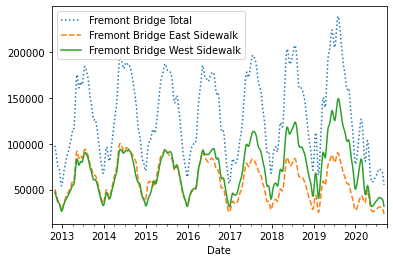

In [86]:
# In the below plotted daily rolling average, you can see that there is a clear trail off in the number of cyclists on the bridge
# once covid occurs around the beginning of 2020

daily = data.resample('D').sum()
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [92]:
by_year = data.resample('Y').sum()
by_year.columns = ['Total', 'East', 'West']
by_year["2018-12":]

,Total,East,West
Date,,,
2018-12-31,2103760.0,851310.0,1252450.0
2019-12-31,2374292.0,899708.0,1474584.0
2020-12-31,883224.0,362068.0,521156.0


In [115]:
# The number of people in total riding the bridge has dropped 58% from 2018 to 2020

percentage_drop = 1 - (float(by_year["2020"]['Total']) / float(by_year["2018"]['Total']))
percentage_drop

0.5801688405521542

# Exercise 4: let's get rich!

Given this apple stock history [this dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv)

* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013
    * When was the peak maximum of volume of trades done?
    * When was the month with the lowest close?
    * And the lowest close of the day in the whole dataset?

In [123]:
"""Open the dataset and display it using pandas"""

apple_stock = pd.read_csv("https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv", index_col='Date', parse_dates=True)
apple_stock

'Open the dataset and display it using pandas'

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [125]:
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


In [146]:
purchase_price = apple_stock.loc["2000-01-31", 'Close'] * 10
purchase_price

Date
2000-01-31    1037.5
Name: Close, dtype: float64

In [148]:
# If you sold 10 apple stocks at the end of 2013 you would have $5,610.20

selling_price = apple_stock.loc["2013-12-31", 'Close'] * 10 
selling_price

Date
2013-12-31    5610.2
Name: Close, dtype: float64

In [151]:
# The profit you have made from buying in 2000 and selling in 2013 is $4,572.7

profit = float(selling_price) - float(purchase_price)
profit

4572.7

In [159]:
# max volume occured on 2000-09-29 with a max volume of 1,855,410,200

max_volume = apple_stock.loc[:,'Volume'].max()
max_volume

1855410200

In [160]:
apple_stock.loc[:,'Volume'].idxmax()

Timestamp('2000-09-29 00:00:00')

Close   1982-07-30
dtype: datetime64[ns]

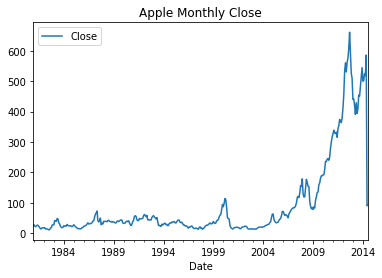

In [204]:
# When was the month with the lowest close - July 1982(1982-07-30)


apple_stock_close = apple_stock[["Close"]]
apple_close_month = apple_stock_close.resample('BM').min()
apple_close_month.plot(title = 'Apple Monthly Close')


apple_close_month.idxmin()

In [202]:
 # The month with the lowest close in the entire dataset was July 1982


apple_stock_close = apple_stock[["Close"]]
apple_stock_close.idxmin()



Close   1982-07-08
dtype: datetime64[ns]